In [1]:
import rdkit

In [2]:
rdkit.__version__

'2024.09.4'

In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats import spearmanr
import numpy as np
from tensorflow.keras.models import load_model
import config
import smi_utils
import pandas as pd

In [6]:
# load the model
model = load_model(config.best_model)

In [7]:
# load data
x_train = np.loadtxt("./smi_input/x_train.txt")
x_val = np.loadtxt("./smi_input/x_val.txt")
x_test = np.loadtxt("./smi_input/x_test.txt")

y_train = np.loadtxt("./smi_input/y_train.txt")
y_val = np.loadtxt("./smi_input/y_val.txt")
y_test = np.loadtxt("./smi_input/y_test.txt")

train results
249/249 ━━━━━━━━━━━━━━━━━━━━ 126s 504ms/step
r2: 0.9049
sp: 0.9443
rmse: 0.6804
mae: 0.4849


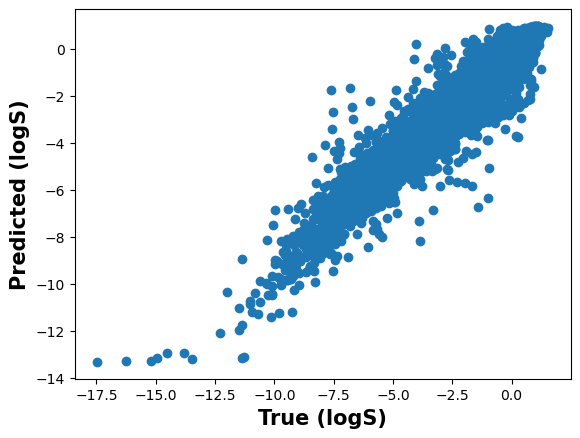

val results
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 512ms/step
r2: 0.7956
sp: 0.8958
rmse: 0.9953
mae: 0.6956


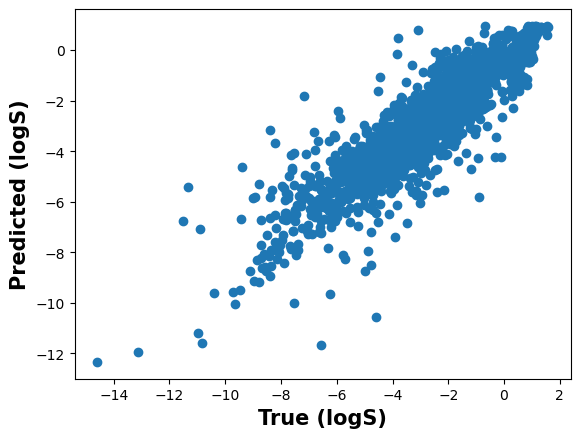

test results
55/55 ━━━━━━━━━━━━━━━━━━━━ 27s 495ms/step
r2: 0.8018
sp: 0.8935
rmse: 0.9702
mae: 0.6717


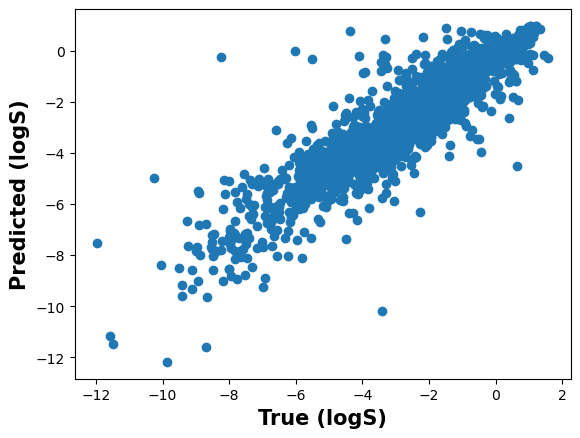

In [8]:
# make predictions
smi_utils.get_results(db_name='train', X=x_train, y=y_train, model=model)
smi_utils.get_results(db_name='val', X=x_val, y=y_val, model=model)
smi_utils.get_results(db_name='test', X=x_test, y=y_test, model=model)